#### Kaggle Competition 3

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt
import warnings
from google.colab import files
import io
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb
from google.colab import drive
warnings.filterwarnings("ignore")

## 1. Data Exploration

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/Shared drives/SI670 Kaggle/competition3/shot_logs_train.csv')
df_train.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,player_id
0,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,4,2,8:02,18.6,0,0.7,23.8,3,missed,"Bazemore, Kent",203145,12.8,rasual butler,2446
1,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,5,3,1:07,12.0,0,0.6,22.9,3,made,"Sefolosha, Thabo",200757,6.8,rasual butler,2446
2,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,6,3,0:01,NaN,1,2.7,39.0,3,missed,"Korver, Kyle",2594,7.8,rasual butler,2446
3,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,7,4,9:19,15.0,0,0.9,23.4,3,missed,"Horford, Al",201143,3.8,rasual butler,2446
4,21400543,"JAN 09, 2015 - WAS vs. CHI",H,W,16,1,2,8:53,8.0,2,2.6,19.5,2,missed,"Moore, E'Twaun",202734,2.4,rasual butler,2446


In [ ]:
df_test = pd.read_csv('/content/drive/Shared drives/SI670 Kaggle/competition3/shot_testing_features.csv')
df_test.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,"Bogdanovic, Bojan",202711,6.1,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,"Brown, Markel",203900,3.4,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,4.4,18.4,2,"Williams, Deron",101114,2.6,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,2.5,3.5,2,"Plumlee, Mason",203486,2.1,brian roberts,203148
4,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,1.1,22.4,3,"Ellington, Wayne",201961,19.8,brian roberts,203148


In [ ]:
df_train.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id
count,1.024560e+05,102456.000000,102456.000000,102456.000000,98283.000000,102456.000000,102456.000000,102456.000000,102456.000000,102456.000000,102456.000000,102456.000000
mean,2.140045e+07,-0.091425,6.556229,2.470543,12.463498,2.083216,2.812940,13.560326,2.267403,159282.339111,4.119749,156627.462823
std,2.571626e+02,13.116312,4.739531,1.141833,5.768045,3.551203,3.090729,8.921458,0.442606,78652.543296,2.757443,79577.163724
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,708.000000
25%,2.140023e+07,-9.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,200746.000000,2.300000,101150.000000
50%,2.140045e+07,-1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.600000,2.000000,201950.000000,3.700000,201609.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.700000,3.000000,3.800000,22.600000,3.000000,203079.000000,5.300000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,204037.000000


## 2. Data Cleaning

In [ ]:
#convert uppercase columns to lowercase
df_train.columns = df_train.columns.str.lower()
df_train

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,player_name,player_id
0,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,4,2,8:02,18.6,0,0.7,23.8,3,missed,"Bazemore, Kent",203145,12.8,rasual butler,2446
1,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,5,3,1:07,12.0,0,0.6,22.9,3,made,"Sefolosha, Thabo",200757,6.8,rasual butler,2446
2,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,6,3,0:01,NaN,1,2.7,39.0,3,missed,"Korver, Kyle",2594,7.8,rasual butler,2446
3,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,7,4,9:19,15.0,0,0.9,23.4,3,missed,"Horford, Al",201143,3.8,rasual butler,2446
4,21400543,"JAN 09, 2015 - WAS vs. CHI",H,W,16,1,2,8:53,8.0,2,2.6,19.5,2,missed,"Moore, E'Twaun",202734,2.4,rasual butler,2446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102451,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,6.2,8.7,2,missed,"Smart, Marcus",203935,0.8,jarrett jack,101127
102452,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,5.2,0.6,2,made,"Turner, Evan",202323,0.6,jarrett jack,101127
102453,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,4.2,16.9,2,made,"Thornton, Marcus",201977,4.2,jarrett jack,101127
102454,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,4.5,18.3,2,missed,"Bradley, Avery",202340,3.0,jarrett jack,101127


In [ ]:
#remove nan data
df_train = df_train.dropna()
df_train

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,player_name,player_id
0,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,4,2,8:02,18.6,0,0.7,23.8,3,missed,"Bazemore, Kent",203145,12.8,rasual butler,2446
1,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,5,3,1:07,12.0,0,0.6,22.9,3,made,"Sefolosha, Thabo",200757,6.8,rasual butler,2446
3,21400558,"JAN 11, 2015 - WAS @ ATL",A,L,-31,7,4,9:19,15.0,0,0.9,23.4,3,missed,"Horford, Al",201143,3.8,rasual butler,2446
4,21400543,"JAN 09, 2015 - WAS vs. CHI",H,W,16,1,2,8:53,8.0,2,2.6,19.5,2,missed,"Moore, E'Twaun",202734,2.4,rasual butler,2446
5,21400543,"JAN 09, 2015 - WAS vs. CHI",H,W,16,2,2,6:40,14.0,0,0.9,18.0,2,made,"Moore, E'Twaun",202734,2.3,rasual butler,2446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102450,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,4,2,5:05,15.3,2,1.6,8.9,2,made,"Sullinger, Jared",203096,5.7,jarrett jack,101127
102451,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,6.2,8.7,2,missed,"Smart, Marcus",203935,0.8,jarrett jack,101127
102452,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,5.2,0.6,2,made,"Turner, Evan",202323,0.6,jarrett jack,101127
102453,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,4.2,16.9,2,made,"Thornton, Marcus",201977,4.2,jarrett jack,101127


In [ ]:
#Excluded matchup and player_name since game_id and player_id is the same data
X_train = df_train.loc[:,~df_train.columns.isin(['shot_result','matchup','player_name'])]
y_train = df_train.loc[:,df_train.columns == "shot_result"]

In [ ]:
X_train.head()

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender,closest_defender_player_id,close_def_dist,player_id
0,21400558,A,L,-31,4,2,8:02,18.6,0,0.7,23.8,3,"Bazemore, Kent",203145,12.8,2446
1,21400558,A,L,-31,5,3,1:07,12.0,0,0.6,22.9,3,"Sefolosha, Thabo",200757,6.8,2446
3,21400558,A,L,-31,7,4,9:19,15.0,0,0.9,23.4,3,"Horford, Al",201143,3.8,2446
4,21400543,H,W,16,1,2,8:53,8.0,2,2.6,19.5,2,"Moore, E'Twaun",202734,2.4,2446
5,21400543,H,W,16,2,2,6:40,14.0,0,0.9,18.0,2,"Moore, E'Twaun",202734,2.3,2446


In [ ]:
y_train.head()

,shot_result
0,missed
1,made
3,missed
4,missed
5,made


In [ ]:
#label-encode categorical X_train data
from sklearn.preprocessing import LabelEncoder
labelencoder_lo = LabelEncoder()
labelencoder_cd = LabelEncoder()
labelencoder_w = LabelEncoder()
X_train["location_cat"] = labelencoder_lo.fit_transform(X_train["location"])
X_train["closest_defender_cat"] = labelencoder_cd.fit_transform(X_train["closest_defender"])
X_train["w_cat"] = labelencoder_w.fit_transform(X_train["w"])

#remove original pre-labelencoded columns
X_train = X_train.loc[:,~X_train.columns.isin(['location','closest_defender','w'])]

In [ ]:
X_train.head()

,game_id,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,player_id,location_cat,closest_defender_cat,w_cat
0,21400558,-31,4,2,8:02,18.6,0,0.7,23.8,3,203145,12.8,2446,0,39,0
1,21400558,-31,5,3,1:07,12.0,0,0.6,22.9,3,200757,6.8,2446,0,387,0
3,21400558,-31,7,4,9:19,15.0,0,0.9,23.4,3,201143,3.8,2446,0,209,0
4,21400543,16,1,2,8:53,8.0,2,2.6,19.5,2,202734,2.4,2446,1,311,1
5,21400543,16,2,2,6:40,14.0,0,0.9,18.0,2,202734,2.3,2446,1,311,1


In [ ]:
#parsing out the game_clock and shot_clock column by hour and minute
#X_train["game_clock"] = X_train["game_clock"].str.replace(":", " ")
#X_train["game_clock"] = pd.to_numeric(X_train["game_clock"])
#X_train[["gameclock_hour","gameclock_minute"]] = X_train["game_clock"].str.split(":",1,expand=True)
X_train["game_clock"] = X_train["game_clock"].str.replace(":", ".")

#remove original game_clock column
#X_train = X_train.loc[:,~X_train.columns.isin(["game_clock", "gameclock_minute"])]

#dropna
X_train = X_train.dropna()
X_train


,game_id,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,player_id,location_cat,closest_defender_cat,w_cat
0,21400558,-31,4,2,8.02,18.6,0,0.7,23.8,3,203145,12.8,2446,0,39,0
1,21400558,-31,5,3,1.07,12.0,0,0.6,22.9,3,200757,6.8,2446,0,387,0
3,21400558,-31,7,4,9.19,15.0,0,0.9,23.4,3,201143,3.8,2446,0,209,0
4,21400543,16,1,2,8.53,8.0,2,2.6,19.5,2,202734,2.4,2446,1,311,1
5,21400543,16,2,2,6.40,14.0,0,0.9,18.0,2,202734,2.3,2446,1,311,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102450,21400006,-16,4,2,5.05,15.3,2,1.6,8.9,2,203096,5.7,101127,0,411,0
102451,21400006,-16,5,3,1.52,18.3,5,6.2,8.7,2,203935,0.8,101127,0,395,0
102452,21400006,-16,6,4,11.28,19.8,4,5.2,0.6,2,202323,0.6,101127,0,430,0
102453,21400006,-16,7,4,11.10,23.0,2,4.2,16.9,2,201977,4.2,101127,0,425,0


In [ ]:
#label-encode categorical y_train data
labelencoder_sr = LabelEncoder()
y_train["shot_result"] = labelencoder_sr.fit_transform(y_train["shot_result"])

#assign missed to 0 and made to 1
y_train = y_train.replace(1, 2)
y_train = y_train.replace(0, 1)
y_train = y_train.replace(2, 0)

y_train

,shot_result
0,0
1,1
3,0
4,0
5,1
...,...
102450,1
102451,0
102452,1
102453,1


## 3. Feature Selection

### 3.1 Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

[0.07509694 0.07262702 0.07092391 0.04919086 0.0776261  0.08349694
 0.04596625 0.07798017 0.10472065 0.01027941 0.07241339 0.0856716
 0.07273934 0.02124215 0.07535383 0.00467143]


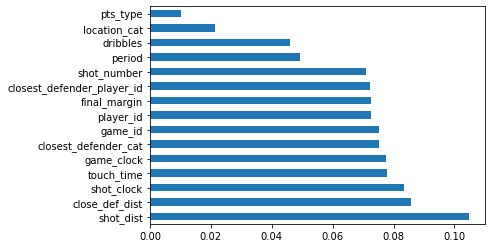

In [ ]:
#find the top 15 important features
fi_model = ExtraTreesClassifier()
fi_model.fit(X_train, y_train)
print(fi_model.feature_importances_)
feat_importances = pd.Series(fi_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### 3.2 Correlation Matrix with Heatmap

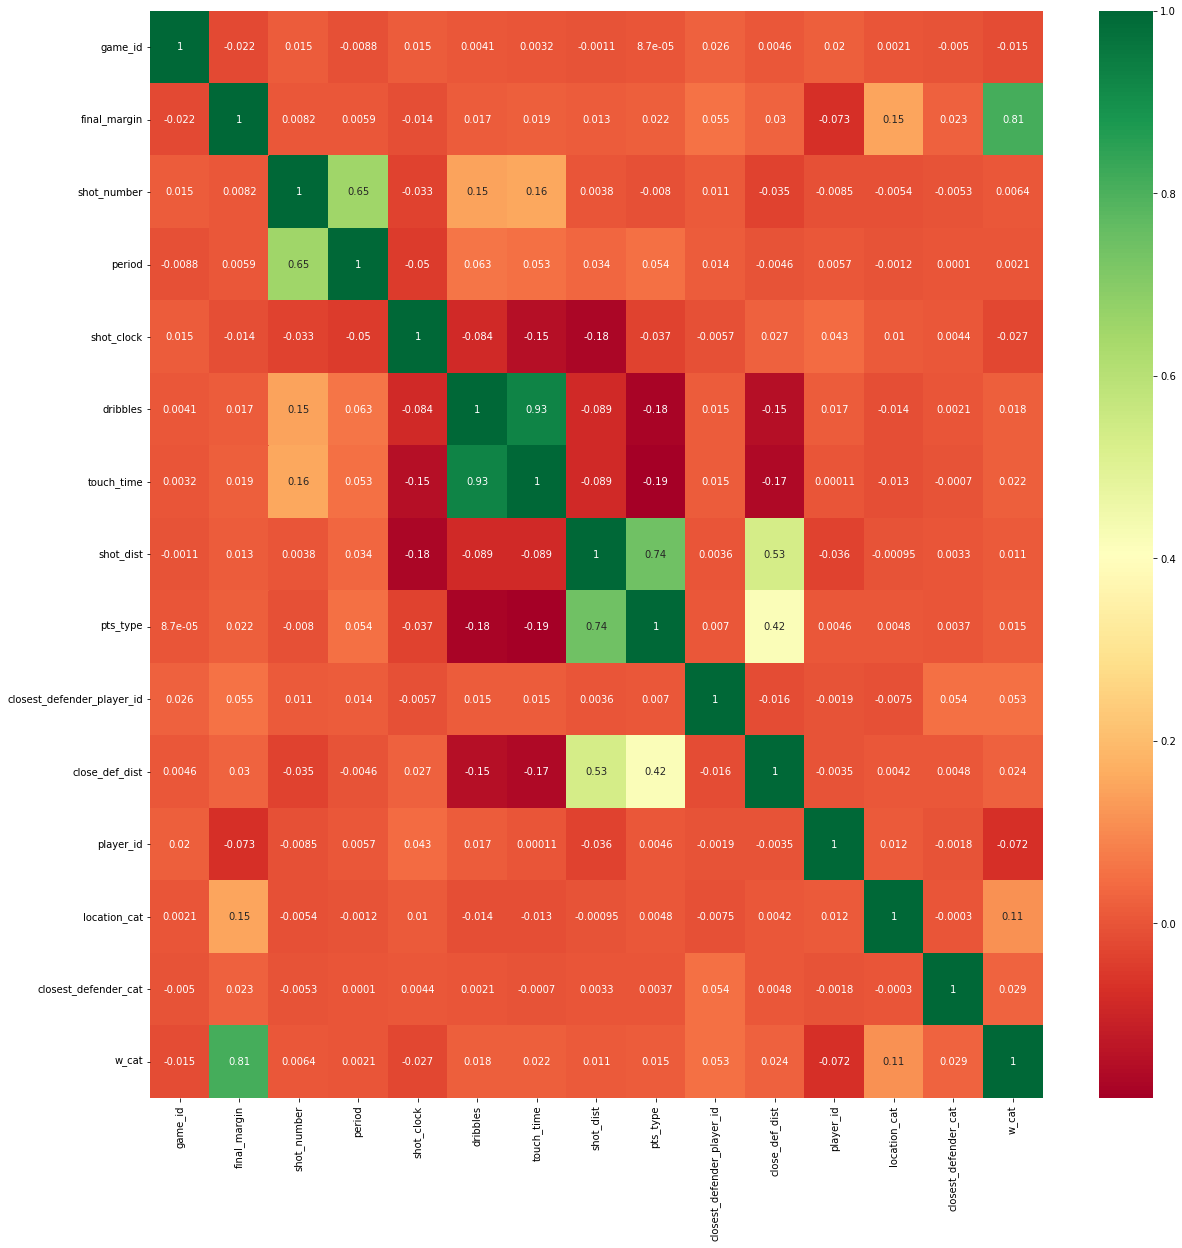

In [ ]:
# correlation heat map
corr = X_train.corr()
top_corr_features = corr.index
plt.figure(figsize = (20,20))
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 4.Choosing/Training/Evaluating Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


In [ ]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_t

,game_id,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,player_id,location_cat,closest_defender_cat,w_cat
73285,21400651,-25,2,1,6.39,15.7,4,2.7,4.9,2,202691,2.9,203463,0,423,0
18385,21400172,5,15,4,1.09,12.4,0,0.9,17.6,2,2744,8.4,202696,0,222,1
60231,21400844,-21,12,4,8.04,18.0,0,0.8,22.9,3,202323,2.3,203501,0,430,0
63228,21400577,-11,3,2,9.13,9.6,2,2.6,8.2,2,201600,1.7,203083,1,23,0
86140,21400554,8,1,1,11.48,12.1,4,4.0,5.5,2,2585,1.7,2200,1,337,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,21400008,7,2,1,7.41,10.5,4,4.5,15.0,2,201952,5.2,200768,1,413,1
57434,21400487,-16,2,1,8.19,10.9,0,1.0,19.3,2,202328,3.1,201160,1,310,0
80123,21400392,1,3,2,4.55,13.5,1,1.7,5.0,2,202334,1.5,203460,0,107,1
892,21400742,-7,4,2,8.37,14.2,8,8.0,18.8,2,101107,4.2,202322,0,459,0


In [ ]:
# Linear regression
def linreg(X_train_t, X_test_t, y_train_t, y_test_t):
    linreg = LinearRegression()
    linreg.fit(X_train_t, y_train_t)
    prediction = linreg.predict(X_test_t)
    linreg_mse = mean_squared_error(y_test_t, prediction)
    return linreg_mse

# Logistic regression
def losreg(X_train_t, X_test_t, y_train_t, y_test_t):
    losreg = LogisticRegression()
    losreg.fit(X_train_t, y_train_t)
    prediction = losreg.predict(X_test_t)
    losreg_mse = mean_squared_error(y_test_t, prediction)
    return losreg_mse

# Random Forest
def rf(X_train_t, X_test_t, y_train_t, y_test_t):
    rf = RandomForestRegressor(random_state=0)
    rf.fit(X_train_t,y_train_t)
    prediction = rf.predict(X_test_t)
    rf_mse = mean_squared_error(y_test_t, prediction)
    return rf_mse


# Ridge
def ridge(X_train_t, X_test_t, y_train_t, y_test_t):
    ridge = Ridge()
    ridge.fit(X_train_t, y_train_t)
    prediction = ridge.predict(X_test_t)
    ridge_mse = mean_squared_error(y_test_t, prediction)
    return ridge_mse


# Lasso Regression
def lasso(X_train_t, X_test_t, y_train_t, y_test_t):
    lasso = Lasso()
    lasso.fit(X_train_t, y_train_t)
    prediction = lasso.predict(X_test_t)
    lasso_mse = mean_squared_error(y_test_t.values, prediction)
    return lasso_mse


# k Nearest Neighbor
def knn(X_train_t, X_test_t, y_train_t, y_test_t):
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_t, y_train_t)
    prediction = knn.predict(X_test_t)
    knn_mse = mean_squared_error(y_test_t, prediction)
    return knn_mse


# Support Vector Regression
def svr(X_train_t, X_test_t, y_train_t, y_test_t):
    svr = SVR()
    svr.fit(X_train_t, y_train_t)
    prediction = svr.predict(X_test_t)
    svc_mse = mean_squared_error(y_test_t, prediction)
    return svc_mse


# XGBoost
def xgbr(X_train_t, X_test_t, y_train_t, y_test_t):
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, n_estimators = 50)
    xg_reg.fit(X_train_t, y_train_t)
    xg_preds = xg_reg.predict(X_test_t)
    xg_mse = mean_squared_error(y_test_t, xg_preds)
    return xg_mse


# Gradient Boosting
def gbr(X_train_t, X_test_t, y_train_t, y_test_t):
    gra_reg = GradientBoostingRegressor(random_state=0, n_estimators = 50)
    gra_reg.fit(X_train_t, y_train_t)
    gra_preds = gra_reg.predict(X_test_t)
    gra_mse = mean_squared_error(y_test_t, gra_preds)
    return gra_mse
  
#Naive Bayes
def gau(X_train_t, X_test_t, y_train_t, y_test_t):
    gnb = GaussianNB()
    gnb.fit(X_train_t, y_train_t)
    prediction = gnb.predict(X_test_t)
    gnb_mse = mean_squared_error(y_test_t, prediction)
    return gnb_mse

# Ada Boost
def ada(X_train_t, X_test_t, y_train_t, y_test_t):
    ada_reg = AdaBoostRegressor(random_state=0, n_estimators = 50)
    ada_reg.fit(X_train_t, y_train_t)
    ada_preds = ada_reg.predict(X_test_t)
    ada_mse = mean_squared_error(y_test_t, ada_preds)
    return ada_mse


# Multi-layer Perceptron
def mlp(X_train_t, X_test_t, y_train_t, y_test_t):
    mlp_regr = MLPRegressor(random_state=1, max_iter=700, activation = 'tanh').fit(X_train_t, y_train_t)
    predictions=mlp_regr.predict(X_test_t)
    mlp_mse = mean_squared_error(y_test_t,predictions)
    return mlp_mse

In [ ]:
print(f"MSE for Linear Regression is {linreg(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for Losgistic Regression is {losreg(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for Random Forest is {rf(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for Lasso is {lasso(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for KNN is {knn(X_train_t, X_test_t, y_train_t, y_test_t)}.")
#print(f"MSE for Support Vector Regression is {svr(X_train_t, X_test_t, y_train_t, y_test_t)}.")
#print(f"MSE for XGBoost is {xgbr(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for Gradient Boost is {gbr(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for Gassian Naive Bayes is {gau(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for Ada Boost is {ada(X_train_t, X_test_t, y_train_t, y_test_t)}.")
print(f"MSE for Multi-layer perception is {mlp(X_train_t, X_test_t, y_train_t, y_test_t)}.")

MSE for Linear Regression is 0.23343916772189355.
MSE for Losgistic Regression is 0.4552576690237574.
MSE for Random Forest is 0.23451687439588947.
MSE for Lasso is 0.24798398437367813.
MSE for KNN is 0.2950582489698327.
MSE for Gradient Boost is 0.22879230077299811.
MSE for Gassian Naive Bayes is 0.40072238897085005.
MSE for Ada Boost is 0.23354439059482635.
MSE for Multi-layer perception is 0.2484122023608654.


In [ ]:
#hypertuning the best model
def hypertune_best_predictor(X_train, y_train):
  params = {'max_depth': [1, 3, 6, 10, 15],
          'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

  gra_reg = GradientBoostingRegressor(random_state=0)
  search = RandomizedSearchCV(estimator=gra_reg,
                              param_distributions=params)
                              #n_iter=3,
                              #n_jobs=4,
                              #verbose=1)

  search.fit(X_train,y_train)
  return search.best_params_

hypertune_best_predictor(X_train_t, y_train_t)

## 5. Apply to Test Data


In [ ]:
from sklearn.metrics import log_loss

In [ ]:
def clean_data(df):
  #convert uppercase columns to lowercase
  df.columns = df.columns.str.lower()

  #Excluded matchup and player_name since game_id and player_id is the same data
  X_train = df.loc[:,~df.columns.isin(['shot_result','matchup','player_name'])]

  #replace na values with average columns values
  X_train['shot_clock'].fillna(value=X_train['shot_clock'].mean(), inplace=True)
  
  #label-encode categorical X_train data
  labelencoder_lc = LabelEncoder()
  labelencoder_cd = LabelEncoder()
  labelencoder_w = LabelEncoder()
  X_train["location_cat"] = labelencoder_lo.fit_transform(X_train["location"])
  X_train["closest_defender_cat"] = labelencoder_cd.fit_transform(X_train["closest_defender"])
  X_train["w_cat"] = labelencoder_w.fit_transform(X_train["w"])

  #remove original pre-labelencoded columns
  X_train = X_train.loc[:,~X_train.columns.isin(['location','closest_defender','w'])]

  #parsing out the game_clock and shot_clock column by hour and minute
  X_train[["gameclock_hour","gameclock_minute"]] = X_train["game_clock"].str.split(":",1,expand=True)

  #remove original game_clock column
  X_train = X_train.loc[:,~X_train.columns.isin(["game_clock", "gameclock_minute"])]
  return X_train

In [ ]:
X_tt = clean_data(df_test)
X_tt

,game_id,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,player_id,location_cat,closest_defender_cat,w_cat,gameclock_hour
0,21400899,24,2,1,3.4,0,0.8,28.2,3,202711,6.1,203148,0,47,1,0
1,21400899,24,4,2,10.3,2,1.9,17.2,2,203900,3.4,203148,0,57,1,11
2,21400899,24,6,2,9.1,2,4.4,18.4,2,101114,2.6,203148,0,425,1,8
3,21400899,24,8,4,3.4,3,2.5,3.5,2,203486,2.1,203148,0,326,1,8
4,21400890,1,1,2,17.4,0,1.1,22.4,3,201961,19.8,203148,1,122,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25608,21400569,8,2,1,16.7,1,2.1,23.1,3,201988,4.2,2446,1,285,1,2
25609,21400569,8,4,3,7.0,0,0.8,22.6,3,201980,5.3,2446,1,161,1,1
25610,21400569,8,6,4,11.0,4,3.7,5.4,2,201965,1.6,2446,1,25,1,8
25611,21400558,-31,1,1,22.0,0,1.2,23.7,3,201960,2.0,2446,0,72,0,4


In [ ]:
def apply_best_predictor(X_train, y_train, X_tt):
    gra_reg = GradientBoostingRegressor(subsample= 0.5, n_estimators = 500, max_depth = 6, learning_rate =0.01)
    gra_reg.fit(X_train, y_train)
    gra_preds = gra_reg.predict(X_tt)
    return gra_preds

In [ ]:
#add a shot result column to dataframe
X_tt["SHOT_RESULT"] = apply_best_predictor(X_train, y_train, X_tt)
X_tt

,game_id,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,player_id,location_cat,closest_defender_cat,w_cat,gameclock_hour,SHOT_RESULT
0,21400899,24,2,1,3.4,0,0.8,28.2,3,202711,6.1,203148,0,47,1,0,0.345356
1,21400899,24,4,2,10.3,2,1.9,17.2,2,203900,3.4,203148,0,57,1,11,0.433745
2,21400899,24,6,2,9.1,2,4.4,18.4,2,101114,2.6,203148,0,425,1,8,0.408759
3,21400899,24,8,4,3.4,3,2.5,3.5,2,203486,2.1,203148,0,326,1,8,0.401168
4,21400890,1,1,2,17.4,0,1.1,22.4,3,201961,19.8,203148,1,122,1,11,0.441444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25608,21400569,8,2,1,16.7,1,2.1,23.1,3,201988,4.2,2446,1,285,1,2,0.401553
25609,21400569,8,4,3,7.0,0,0.8,22.6,3,201980,5.3,2446,1,161,1,1,0.417861
25610,21400569,8,6,4,11.0,4,3.7,5.4,2,201965,1.6,2446,1,25,1,8,0.464823
25611,21400558,-31,1,1,22.0,0,1.2,23.7,3,201960,2.0,2446,0,72,0,4,0.265959


## 6. Make Submission File

In [ ]:
#exclude unneeded columns
final = X_tt.loc[:,X_tt.columns.isin(['game_id', 'player_id', 'shot_number','SHOT_RESULT'])]

#convert int to str to combine
final['game_id'] = final['game_id'].apply(str)
final['player_id'] = final['player_id'].apply(str)
final['shot_number'] = final['shot_number'].apply(str)


#join columns game_id, player_id and shot_number
final["ID"] = final[['game_id', 'player_id', 'shot_number']].apply(lambda x: '-'.join(x), axis=1)

#remove original columns
final = final.loc[:,final.columns.isin(['ID','SHOT_RESULT'])]

#change order of columns
final = final[["ID", 'SHOT_RESULT']]

#set ID as index
final = final.set_index("ID")
final

,SHOT_RESULT
ID,
21400899-203148-2,0.345356
21400899-203148-4,0.433745
21400899-203148-6,0.408759
21400899-203148-8,0.401168
21400890-203148-1,0.441444
...,...
21400569-2446-2,0.401553
21400569-2446-4,0.417861
21400569-2446-6,0.464823


In [ ]:
final.to_csv('/content/drive/Shared drives/SI670 Kaggle/competition3/shot_result_prediction.csv')